# Takens Embedding parameter estimation using Persistent Homology

## Introduction
The study of time series plays a huge role in data analysis. One of approaches to it is the so called Nonlinear Time Series Analysis, which relies on an assumption that data is deterministic and performs state-space reconstruction of the underlying dynamics. The main result is due to Takens. The reconstruction is not, of course, identical to the internal dynamics, but due to the Takens theorem, the reconstructed state-space is topologically equivalent to the proper one.

The standard procedure of reconstruction is the delay-coordinate embedding. That is, given a time series $X$, one constructs $m$-dimensional vectors $$R(t) = [X(t), X(t-\tau), ..., X(t-(m-1)\tau ]$$

## Computations
[The data is taken from here](https://physics.emory.edu/faculty/weeks/research/tseries1.html).

In [1]:
import numpy as np
import teaspoon.SP.tsa_tools as tsa
from teaspoon.parameter_selection.FNN_n import FNN_n
from teaspoon.parameter_selection.MsPE import MsPE_n
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

### Get the data

In [2]:
path_to_data = 'data/timeser/'
filenames = ['ROSSLER.DAT', 'LORENZ.DAT', 'HENON.DAT']
data_paths = [path_to_data + filename for filename in filenames]
data = [np.loadtxt(data_path) for data_path in data_paths]
print([d.shape for d in data])
data = [d[::(len(d)//2048)] for d in data]
print([d.shape for d in data])

[(8192,), (16384,), (16384,)]
[(2048,), (2048,), (2048,)]


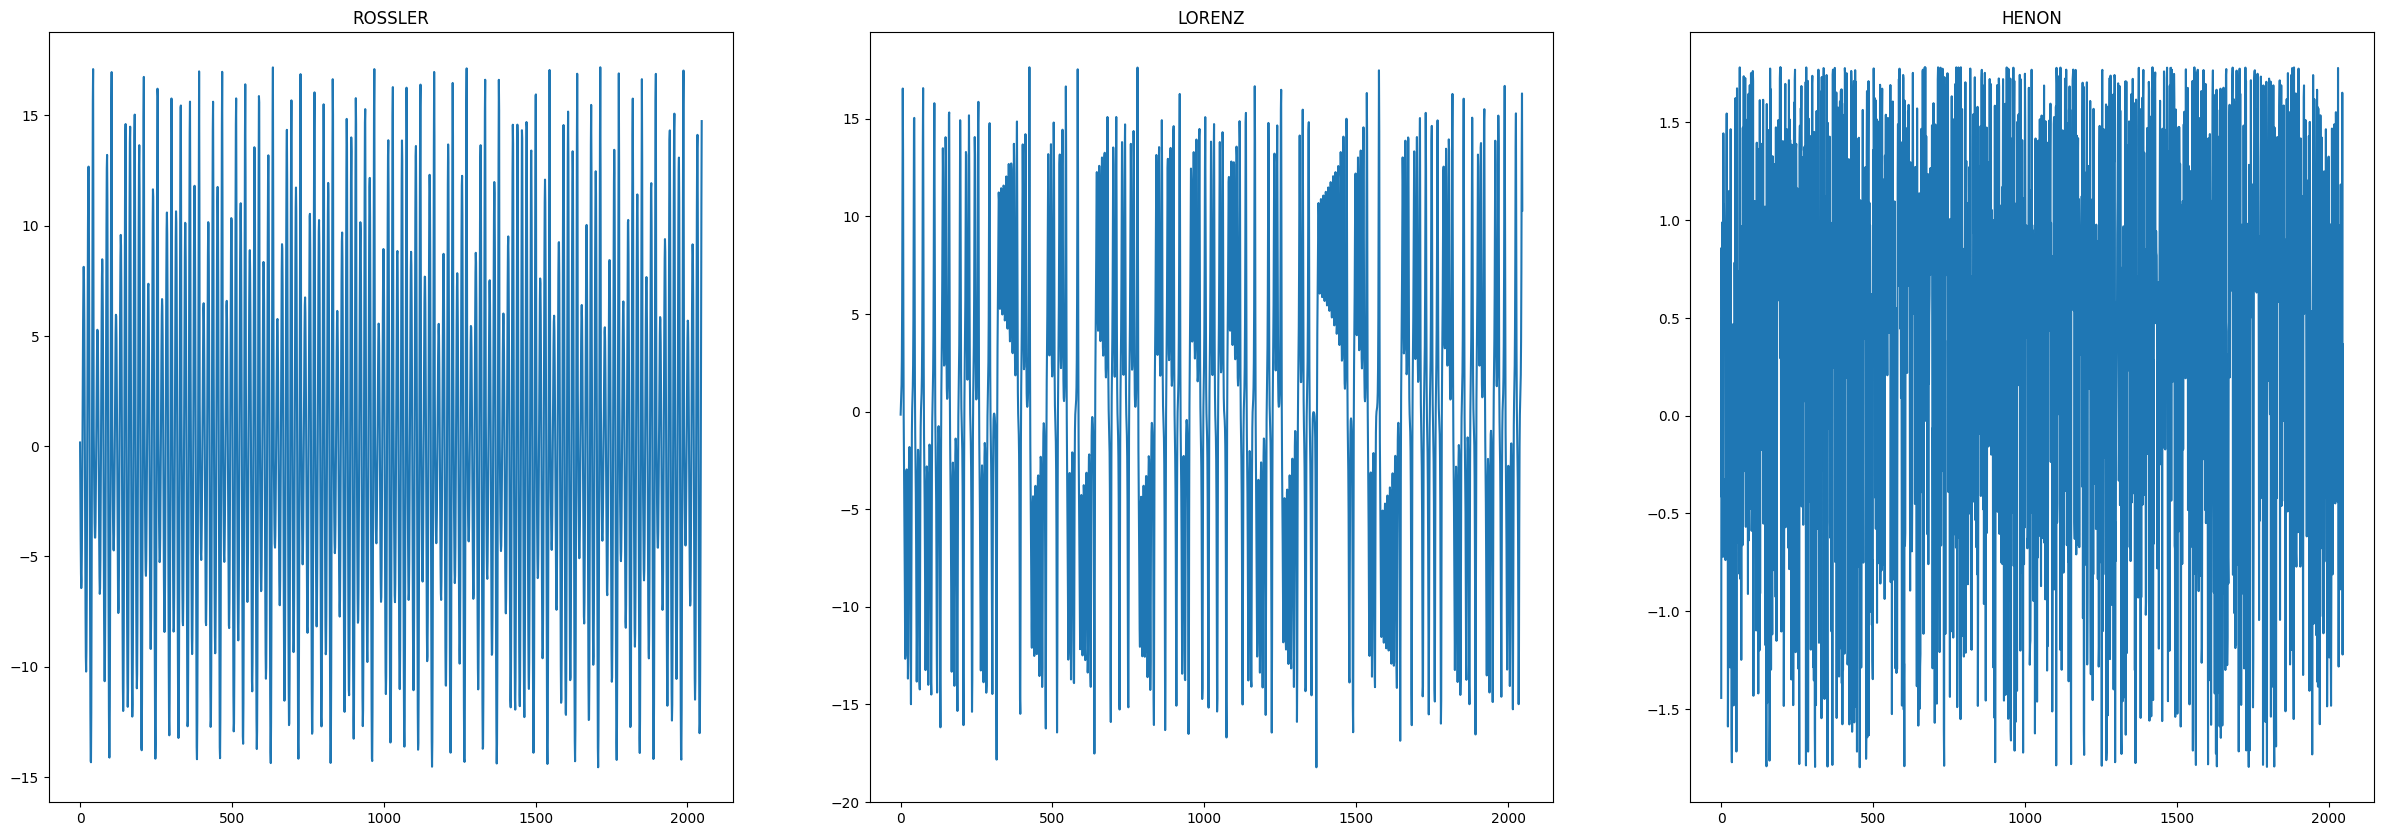

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))
for i, d in enumerate(data):
    axes[i].plot(range(d.shape[0]), d)
    axes[i].set_title(filenames[i][:-4])
fig.savefig('dinsys.png')

### Embed data

In [4]:
TAU=1
MAX_DIM = 5
embedded_data = [None] * len(data)
for num, d in enumerate(data):
    embeddings = [d.reshape(-1,1)] + [None] * (MAX_DIM-1)
    for i in range(2, MAX_DIM+1):
        if len(d.shape) == 1:
            d = d.reshape(-1,1)
        embeddings[i-1] = tsa.takens(d, n=i, tau=TAU).squeeze()
    embedded_data[num] = embeddings

### Compute PH for embeddings

In [16]:
N_PERM=100
homologies = [None] * len(embedded_data)
for num, d in enumerate(embedded_data):
    homology_per_data = [None] * (MAX_DIM+1)
    for i, emb_data in enumerate(d):
        hom =  ripser(emb_data, maxdim=MAX_DIM, n_perm=N_PERM)
        homology_per_data[i] = hom
    homologies[num] = homology_per_data

### Plot results

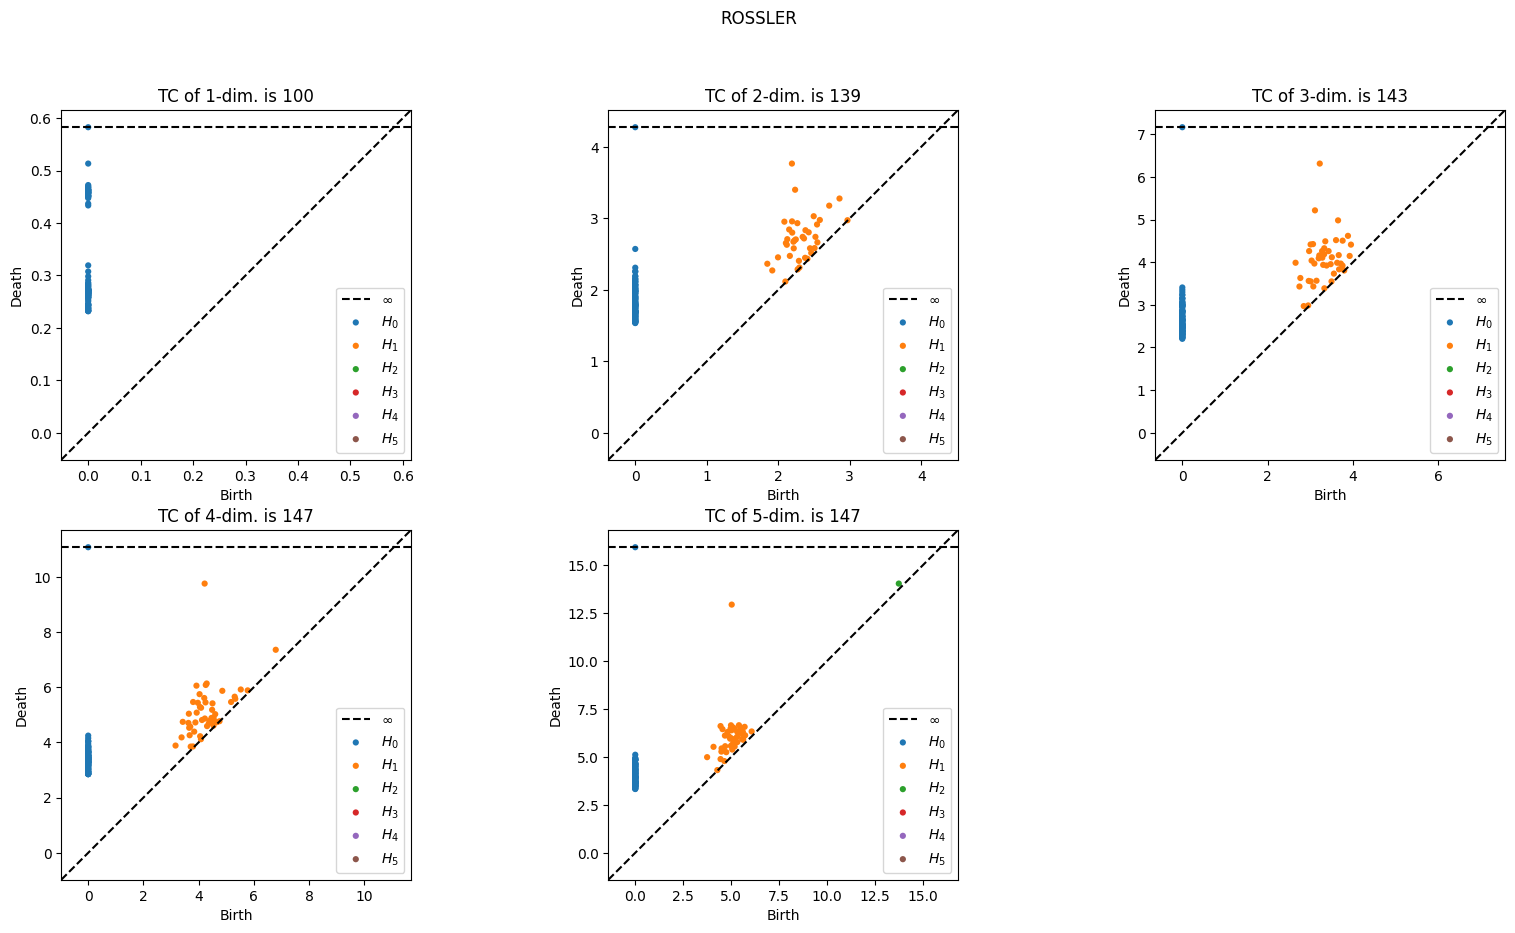

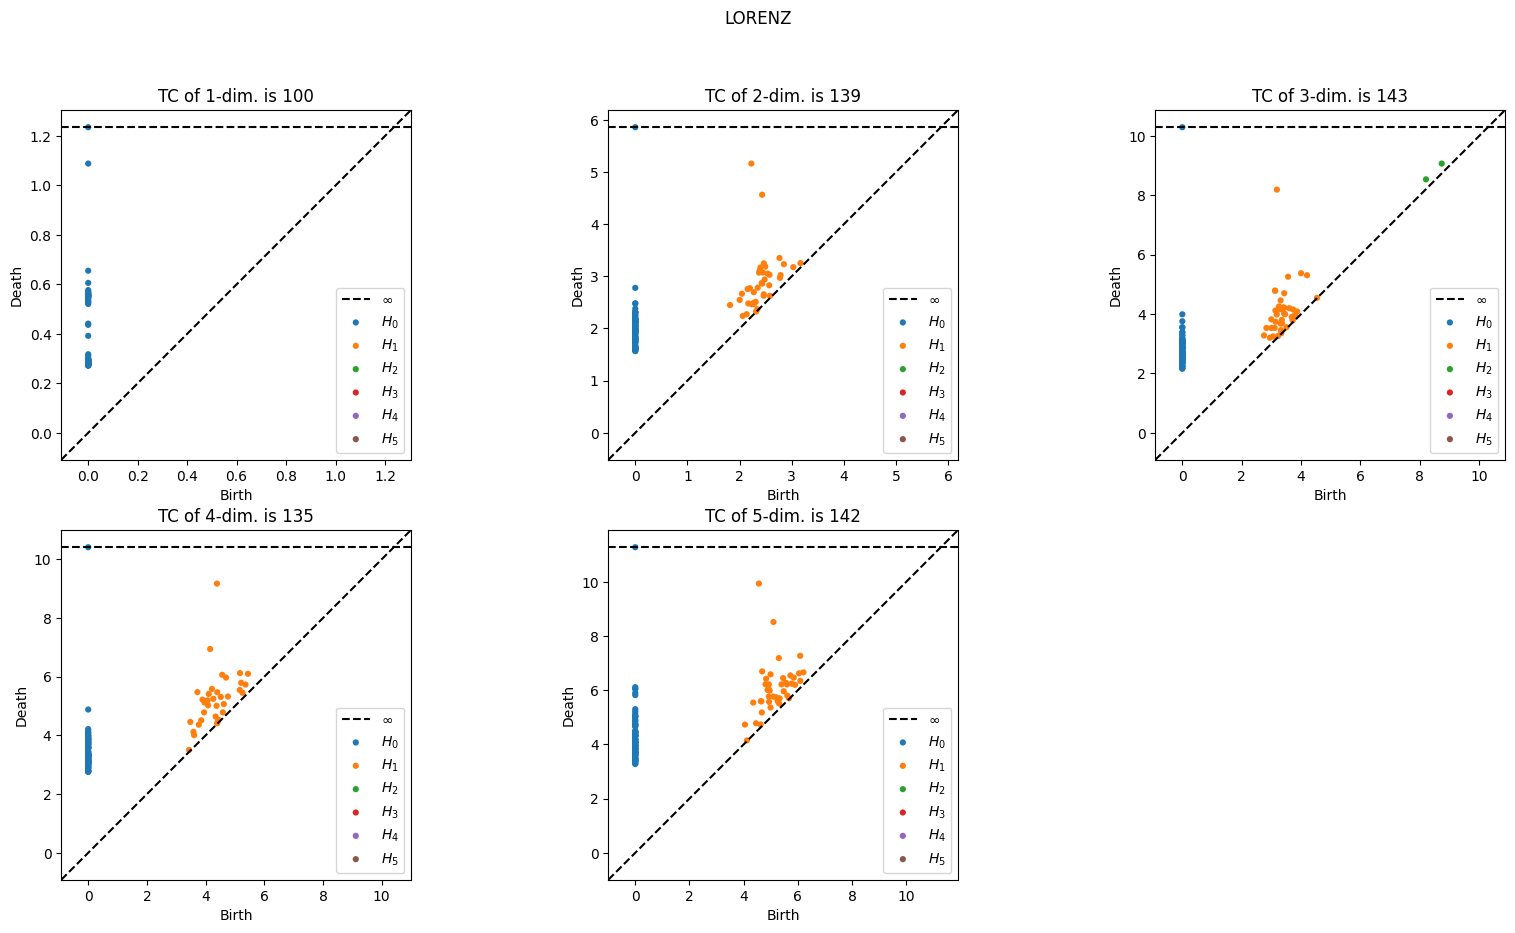

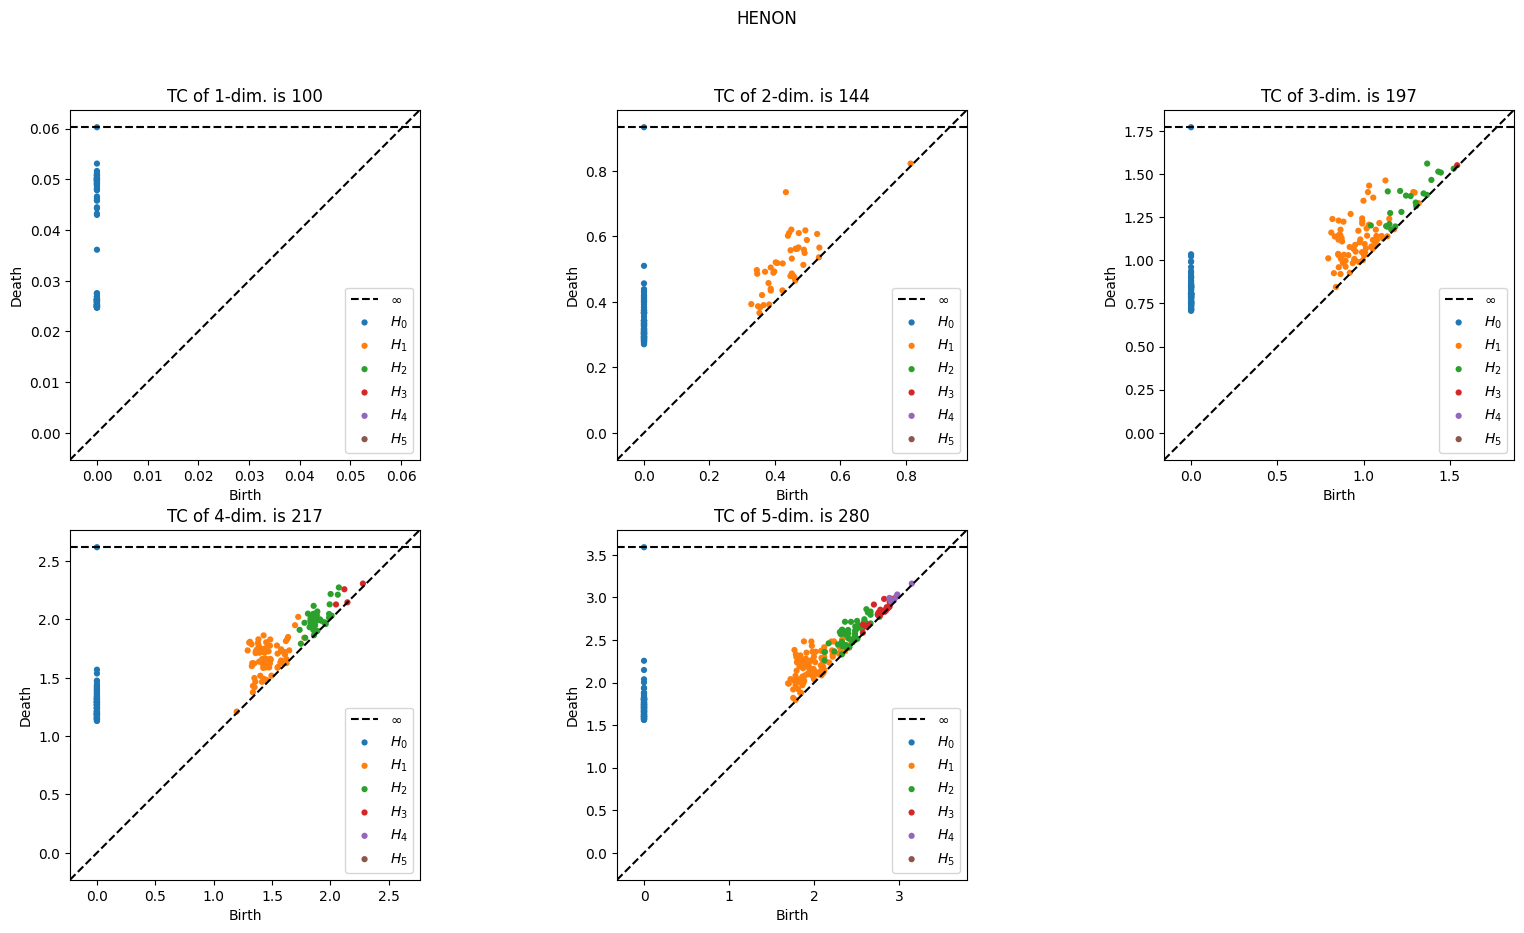

In [68]:
for num, dh in enumerate(homologies):
    fig, axes = plt.subplots(2,3, figsize=(20,10))
    for i, hom in enumerate(dh):
        if hom is None:
            fig.delaxes(axes[i//3, i%3])
        else:
            TC = sum([dim.shape[0] for dim in hom["dgms"]])
            plot_diagrams(hom['dgms'], ax=axes[i//3, i%3])
            axes[i//3, i%3].set_title("TC of {}-dim. is {}".format(i+1, TC))
    fig.suptitle(filenames[num][:-4])
    fig.savefig("{}.png".format(filenames[num][:-4]))

### Compute TC

In [42]:
TCs

0

In [48]:
for i, dh in enumerate(homologies):
    print(filenames[i])
    TCs = [None] * 5
    for j, hom in enumerate(dh):
        if hom is not None:
            TC = sum([dim.shape[0] for dim in hom["dgms"]])
            TCs[j] = TC
    print("TC of 1-dim is {}\nTC of 2-dim is {}\nTC of 3-dim is {}\nTC of 4-dim is {}\nTC of 5-dim is{}".format(*TCs))

ROSSLER.DAT
TC of 1-dim is 100
TC of 2-dim is 139
TC of 3-dim is 143
TC of 4-dim is 147
TC of 5-dim is147
LORENZ.DAT
TC of 1-dim is 100
TC of 2-dim is 139
TC of 3-dim is 143
TC of 4-dim is 135
TC of 5-dim is142
HENON.DAT
TC of 1-dim is 100
TC of 2-dim is 144
TC of 3-dim is 197
TC of 4-dim is 217
TC of 5-dim is280


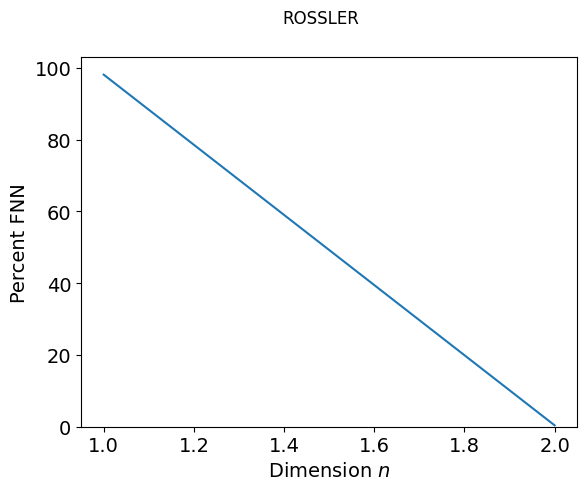

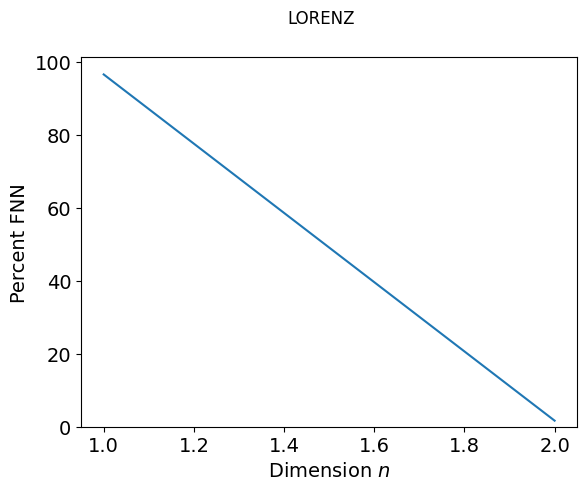

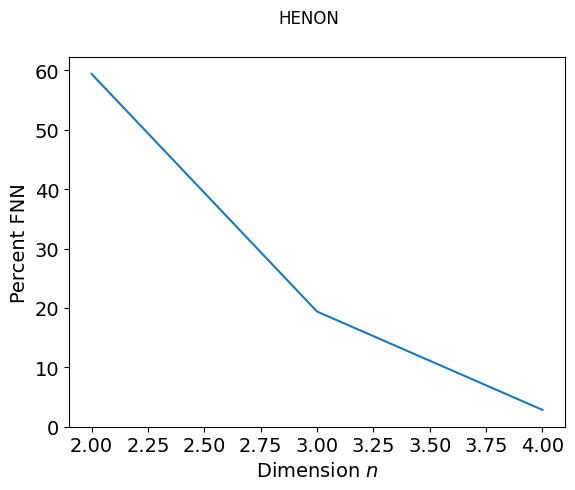

In [65]:
for i, d in enumerate(data):
    fig = plt.figure()
    fig.suptitle(filenames[i][:-4])
    FNN_n(d, tau=1, plotting=True)
    fig.savefig("{}_FNN.png".format(filenames[i][:-4]))

### Rossler dataset

(2048,)


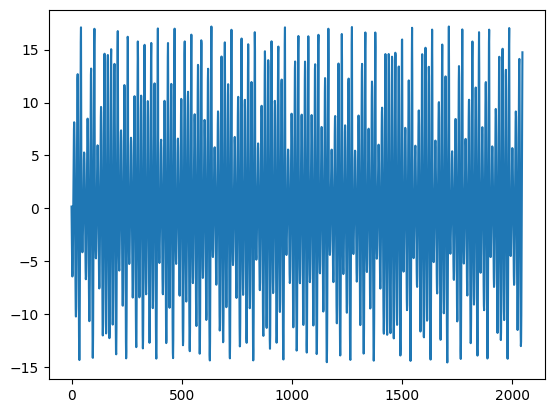

In [2]:
rossler = np.loadtxt('data/timeser/ROSSLER.DAT')[::4]
print(rossler.shape)
plt.plot(range(rossler.shape[0]), rossler)

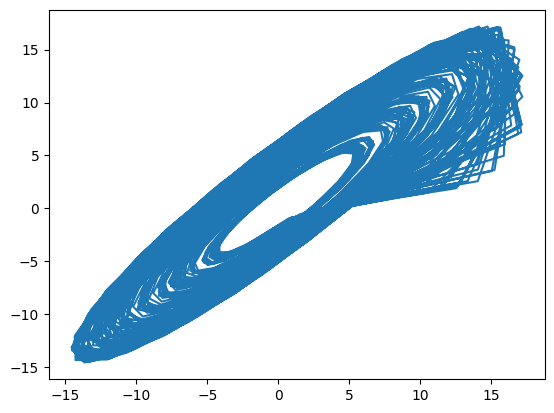

In [3]:
rossler_2 = tsa.takens(rossler.reshape(-1,1), n=2, tau=1).squeeze(0)
#dist_matr_2 = distance_matrix(rossler_2, rossler_2)
#np.savetxt("./data/timeser/rossler_2.txt", dist_matr_2)
plt.plot(rossler_2[:,0], rossler_2[:,1])

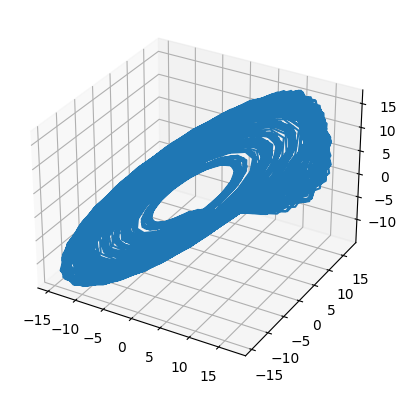

In [4]:
rossler_3 = tsa.takens(rossler, n=3, tau=1)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(rossler_3[:,0], rossler_3[:,1], rossler_3[:,2])

In [9]:
rossler_4 = tsa.takens(rossler, n=4, tau=1)
rossler_5 = tsa.takens(rossler, n=5, tau=1)

In [5]:
rossler_ph = ripser(rossler.reshape(-1,1), maxdim=5, n_perm=100)
rossler_2_ph = ripser(rossler_2, maxdim=5, n_perm=100)
rossler_3_ph = ripser(rossler_3, maxdim=5, n_perm=100)

In [10]:
rossler_4_ph = ripser(rossler_4, maxdim=5, n_perm=100)

NameError: name 'rossloer_5' is not defined

In [11]:
rossler_5_ph = ripser(rossler_5, maxdim=5, n_perm=100)

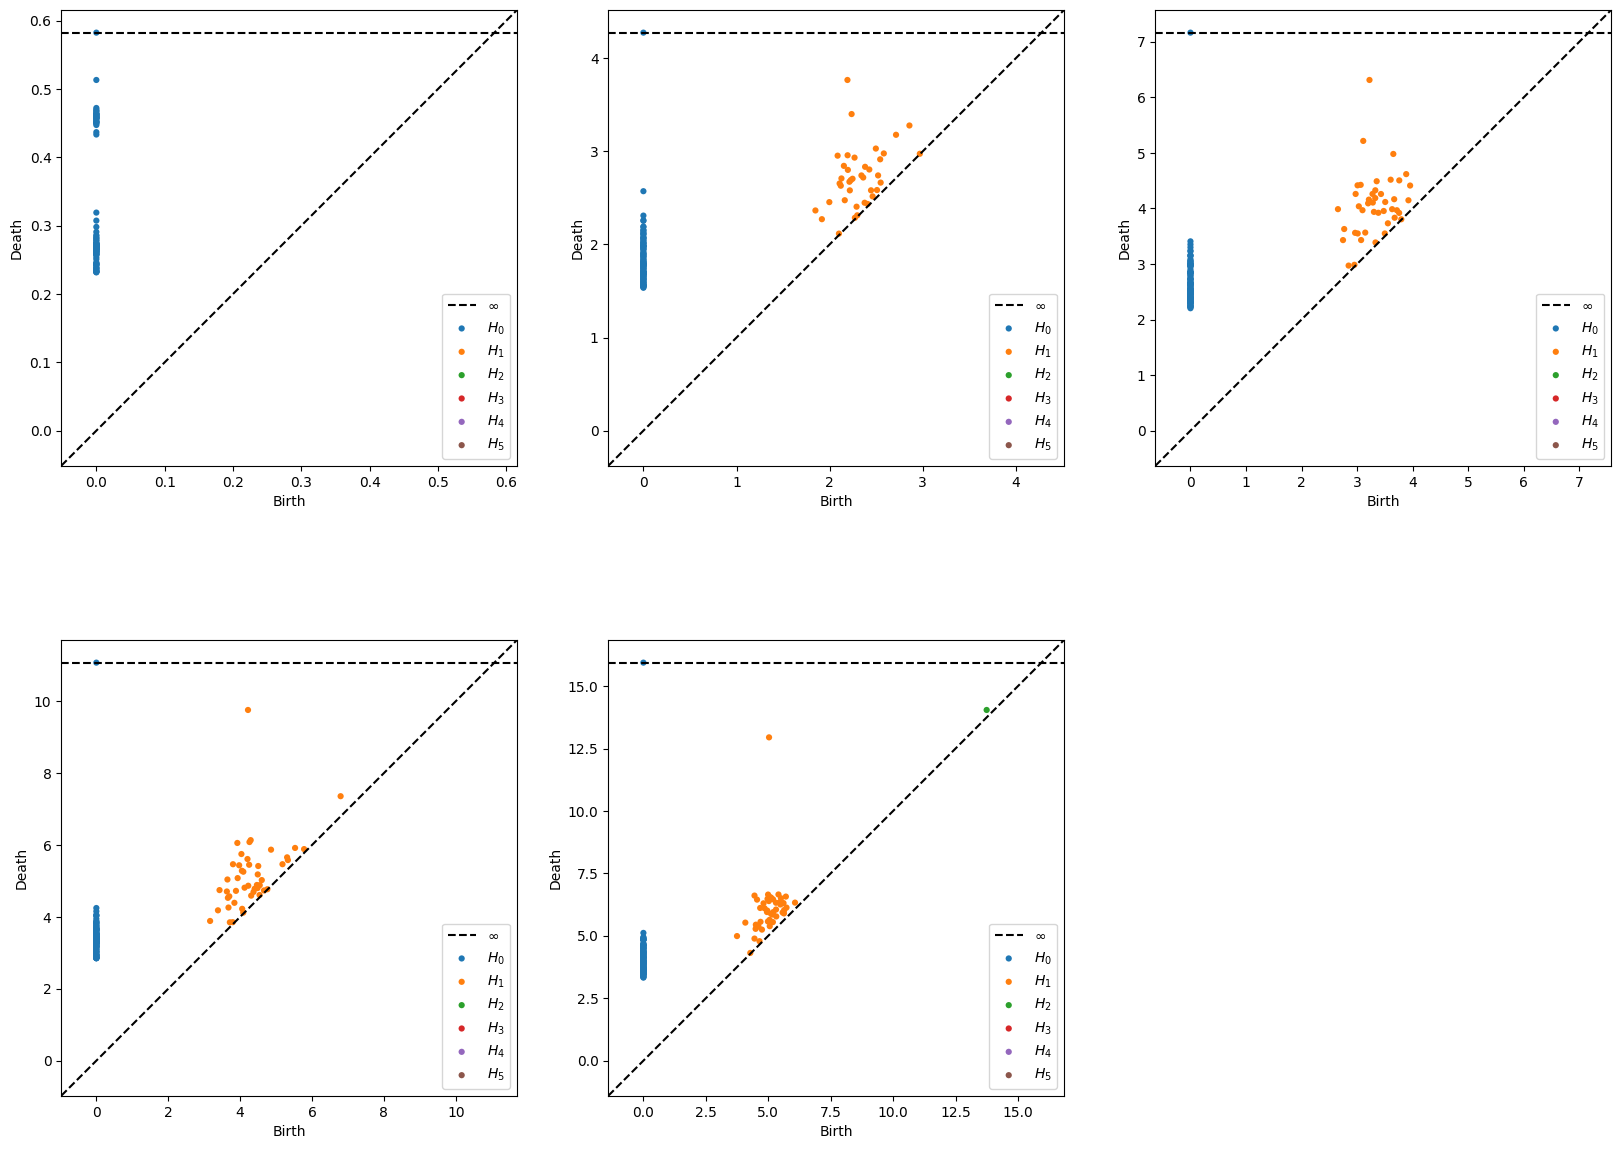

In [16]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
plot_diagrams(rossler_ph['dgms'], ax=ax[0,0])
plot_diagrams(rossler_2_ph['dgms'], ax=ax[0,1])
plot_diagrams(rossler_3_ph['dgms'], ax=ax[0,2])
plot_diagrams(rossler_4_ph['dgms'], ax=ax[1,0])
plot_diagrams(rossler_5_ph['dgms'], ax=ax[1,1])
fig.delaxes(ax[1,2])

In [17]:
print("TC of 1-dim is {}\nTC of 2-dim is {}\nTC of 3-dim is {}\nTC of 4-dim is {}\nTC of 5-dim is{}".format(
    len([x for dim in rossler_ph['dgms'] for x in dim]),
    len([x for dim in rossler_2_ph['dgms'] for x in dim]),
    len([x for dim in rossler_3_ph['dgms'] for x in dim]),
    len([x for dim in rossler_4_ph['dgms'] for x in dim]),
    len([x for dim in rossler_5_ph['dgms'] for x in dim])
))

TC of 1-dim is 100
TC of 2-dim is 139
TC of 3-dim is 143
TC of 4-dim is 147
TC of 5-dim is147


In [28]:
print("FNN of Rossler is {}".format(
    FNN_n(rossler, tau=1)[1],
))

FNN of Rossler is 2


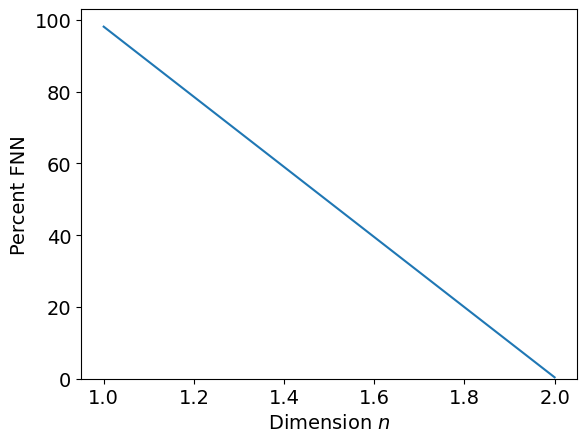

(array([98.09384164,  0.39119804]), 2)

In [29]:
FNN_n(rossler, tau=1,plotting=True)

### Lorenz dataset

(2048,)


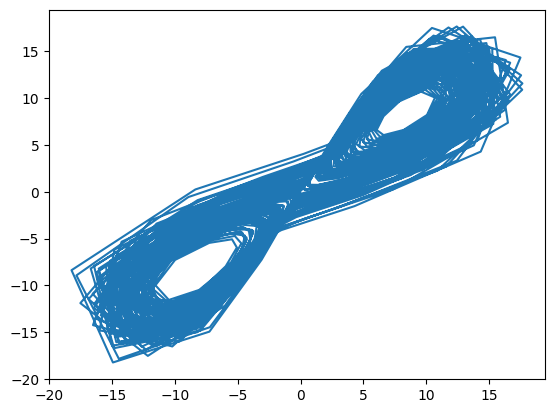

In [45]:
lorenz = np.loadtxt('./data/timeser/LORENZ.DAT')[::8]
print(lorenz.shape)
lorenz_2 = tsa.takens(lorenz.reshape(-1,1), n=2, tau=1).squeeze(0)
lorenz_3 = tsa.takens(lorenz.reshape(-1,1), n=3, tau=1).squeeze(0)
plt.plot(lorenz_2[:,0], lorenz_2[:,1])

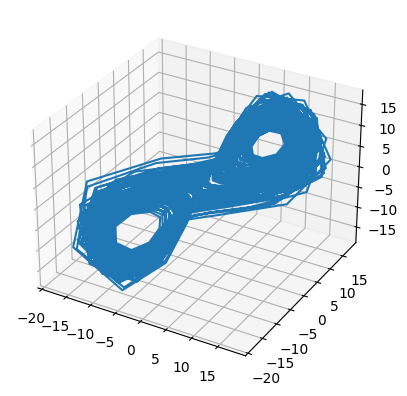

In [46]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(lorenz_3[:,0], lorenz_3[:,1], lorenz_3[:,2])